In [22]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine,inspect,text
from IPython.display import display

In [23]:
## Building connection with SQL
username = "root"        
password = "12345"       
host = "localhost"       
database = "minor_project"  
engine=create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

In [24]:
df = pd.read_sql('''SELECT * FROM restaurants''',engine)
display(df)

,restaurant_name,online_order,book_table,rating,number_of_votes,city_locality,restaurant_type,popular_dishes,cuisines_offered,approx_cost_for_two,category_type,listed_city,rating_category,cost_category,online_order_flag,book_table_flag,num_cuisines,num_dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari\r,Excellent,High,1,1,3,7
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari\r,Excellent,High,1,0,3,7
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari\r,Good,High,1,0,3,7
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari\r,Good,Low,0,0,2,1
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari\r,Good,Medium,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Not Available,Continental,1.0,Pubs and bars,Whitefield\r,Good,Low,0,0,1,1
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Not Available,Finger Food,600.0,Pubs and bars,Whitefield\r,Poor,Medium,0,0,1,1
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,Not Available,Finger Food,2.0,Pubs and bars,Whitefield\r,Poor,Low,0,0,1,1
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2.0,Pubs and bars,Whitefield\r,Excellent,Low,0,1,1,3


In [4]:
# Summary Statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,51717.0,2.981209,1.516766,0.0,3.0,3.6,3.9,4.9
number_of_votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0
approx_cost_for_two,51717.0,360.619584,229.200263,1.0,200.0,350.0,500.0,950.0
online_order_flag,51717.0,0.588665,0.492080,0.0,0.0,1.0,1.0,1.0
book_table_flag,51717.0,0.124698,0.330379,0.0,0.0,0.0,0.0,1.0
num_cuisines,51717.0,2.453043,1.270445,1.0,2.0,2.0,3.0,8.0
num_dishes,51717.0,3.034321,2.643134,1.0,1.0,1.0,7.0,7.0


In [5]:
df_filtered = df[df['approx_cost_for_two'] <= 40]

# Drop duplicates (DISTINCT)
df_filtered = df_filtered.drop_duplicates()

print(df_filtered.head())

        restaurant_name online_order book_table  rating  number_of_votes  \
67   Gustoes Beer House           No         No     4.1              868   
119       K27 - The Pub           No         No     3.1               30   
166           Patio 805          Yes        Yes     4.1              364   
207       Chutney Chang          Yes        Yes     4.1             2339   
217             Toscano          Yes        Yes     4.3             1129   

    city_locality restaurant_type  \
67   Banashankari             Pub   
119  Banashankari             Bar   
166     Jayanagar   Casual Dining   
207     Jayanagar   Casual Dining   
217     Jayanagar   Casual Dining   

                                        popular_dishes  \
67   Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
119                                      Not Available   
166  Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...   
207  Veg Momos, Brownie Chocolate, Palak Chaat, Mut...   
217  Pizza, Pasta, Salads, Cal

## Conclusion
- From the dataset, only Srinidhi Sagar, Srinidhi Sagar Deluxe, and Srinidhi Sagar Food Line have the lowest cost for two people (≤ 40).
- These restaurants are the most budget-friendly options in the dataset.

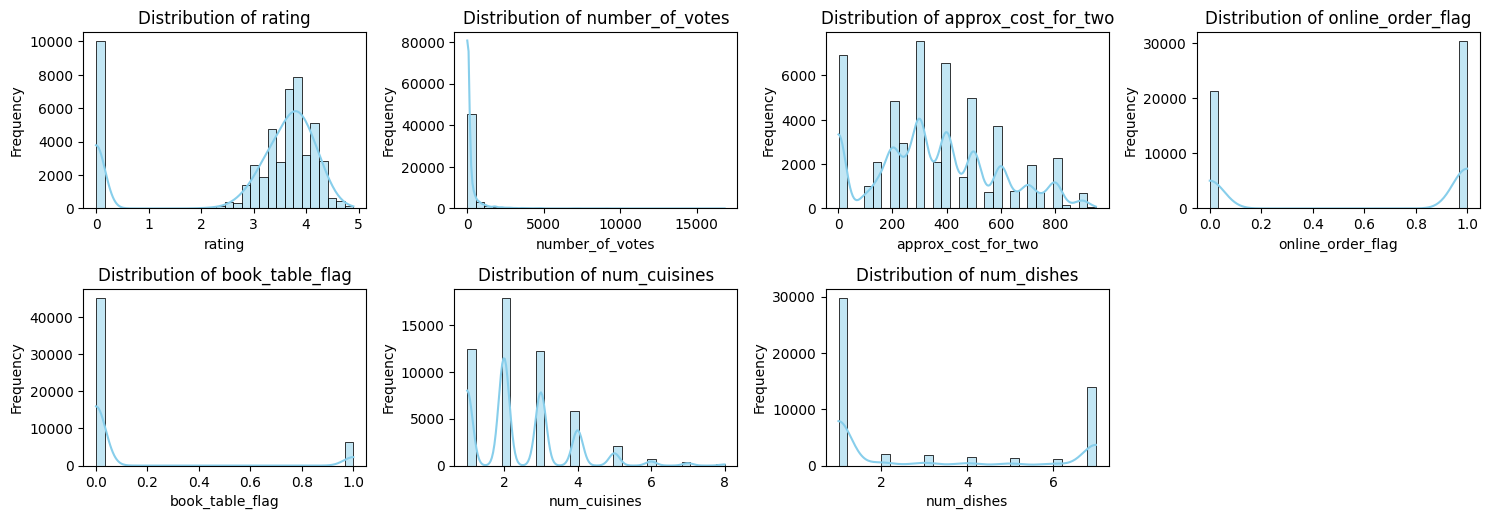

In [6]:
# Select only numeric columns
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()

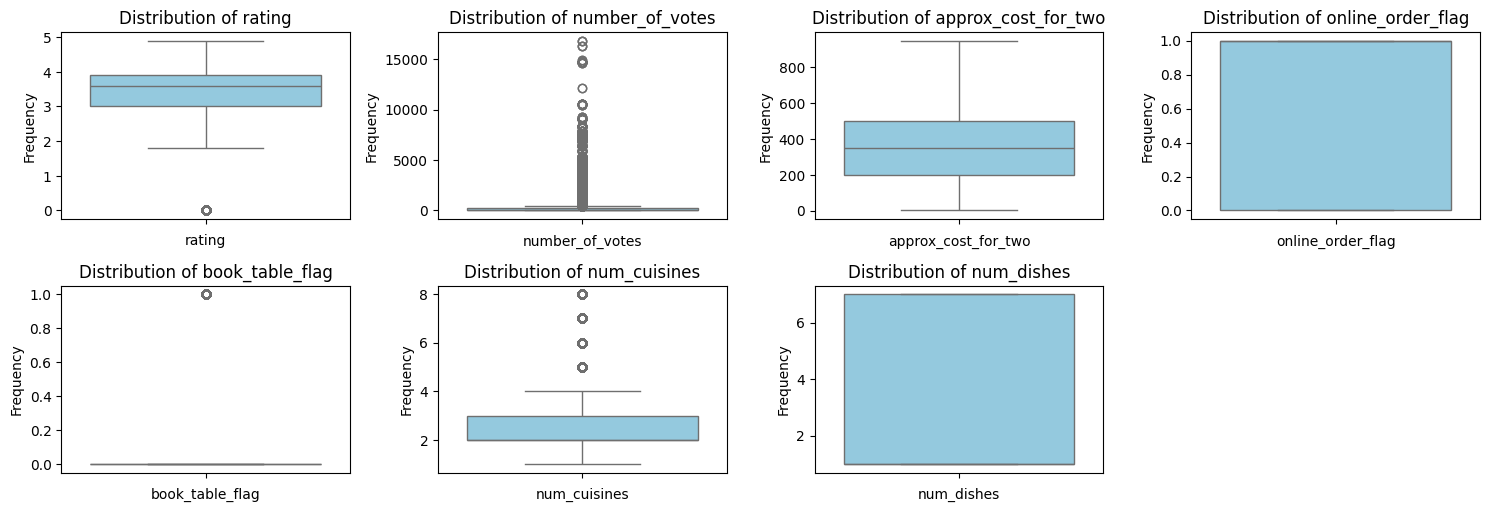

In [7]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()

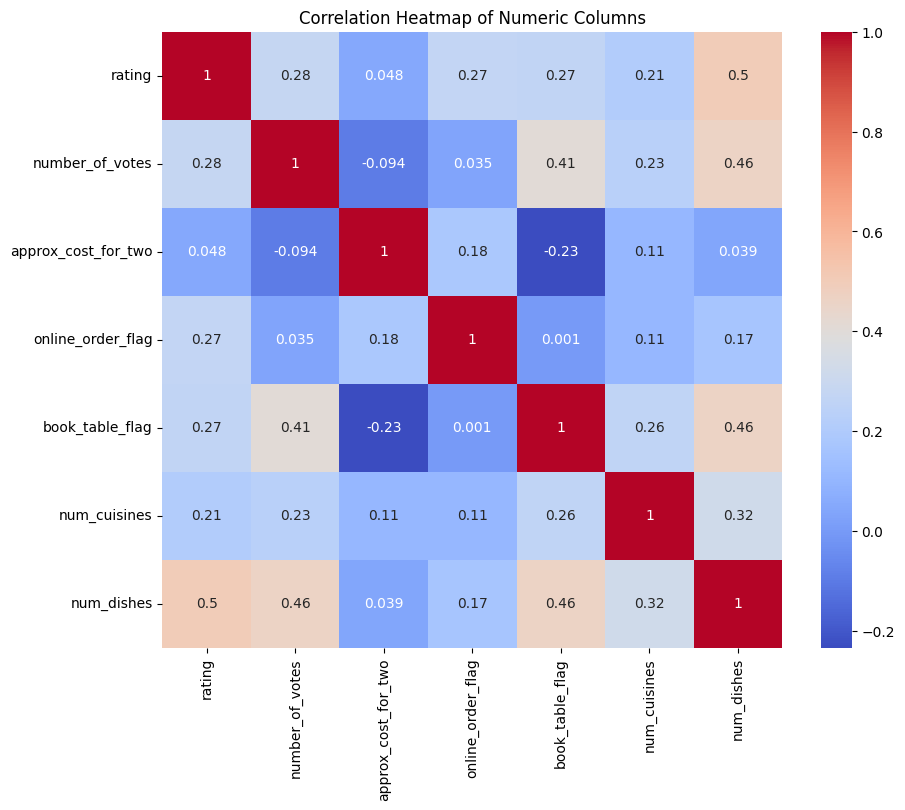

In [8]:
cor_num = df.select_dtypes(include=np.number)
cor_num = cor_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_num, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

## Categorical Analysis(Univariative Analysis)

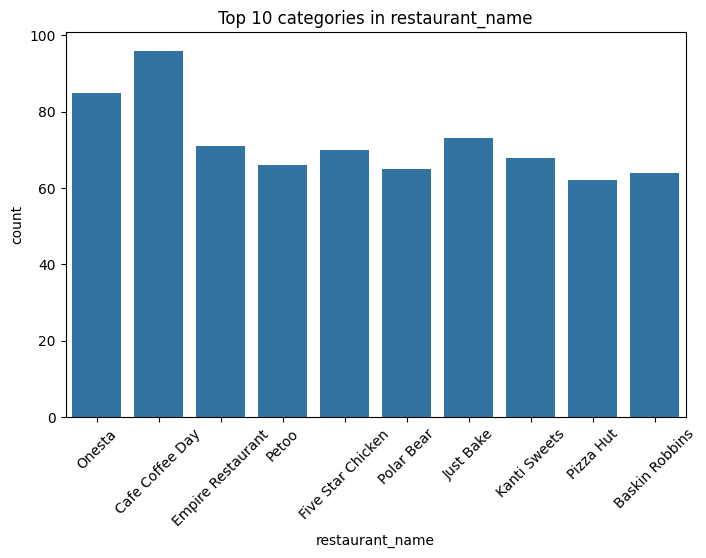

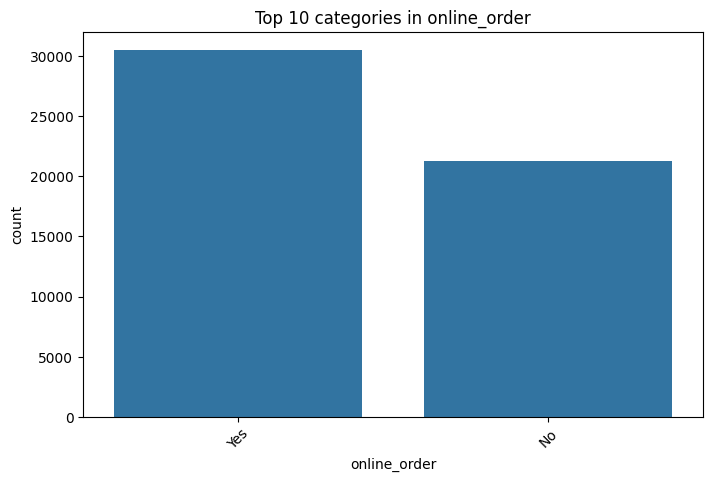

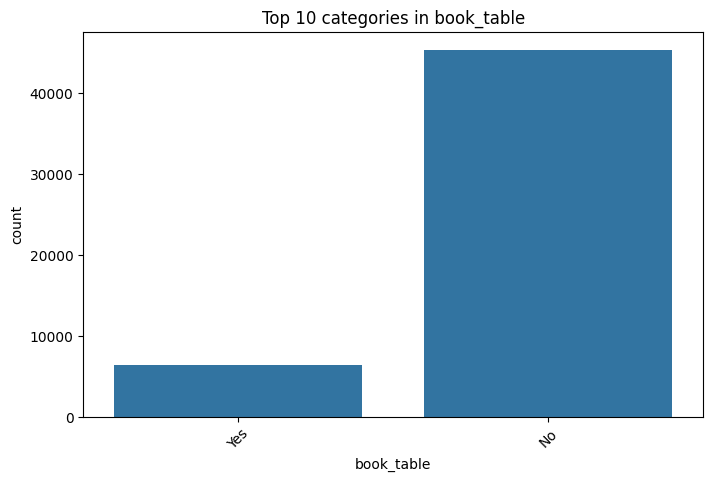

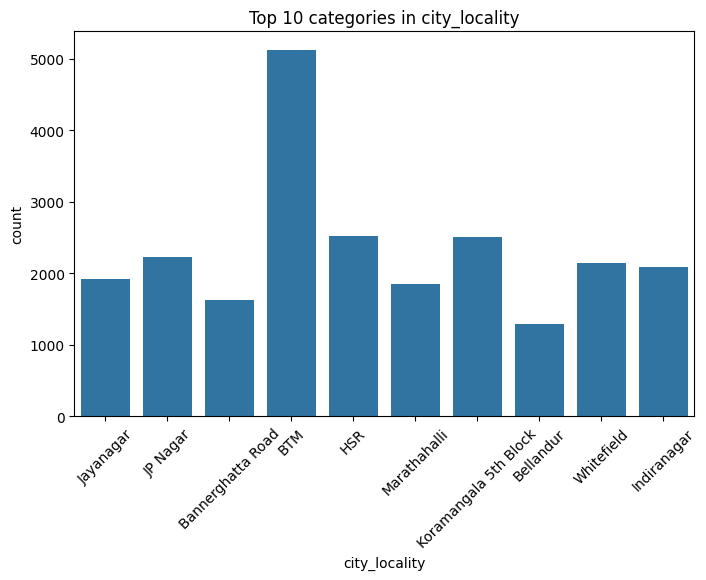

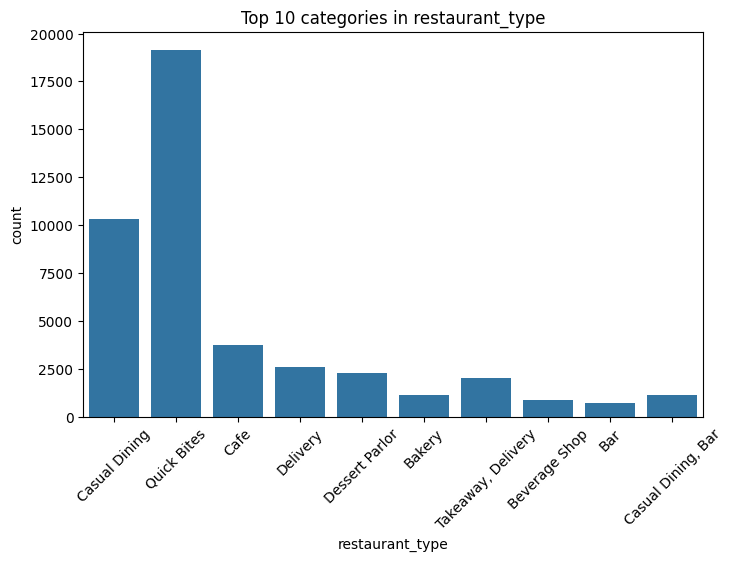

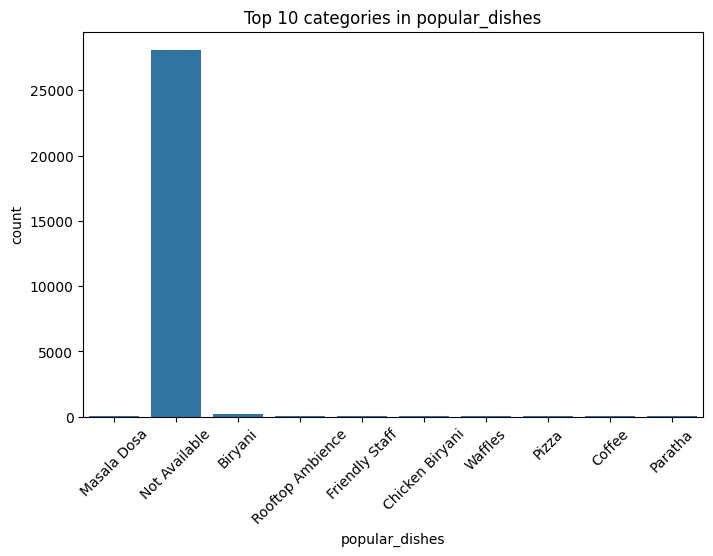

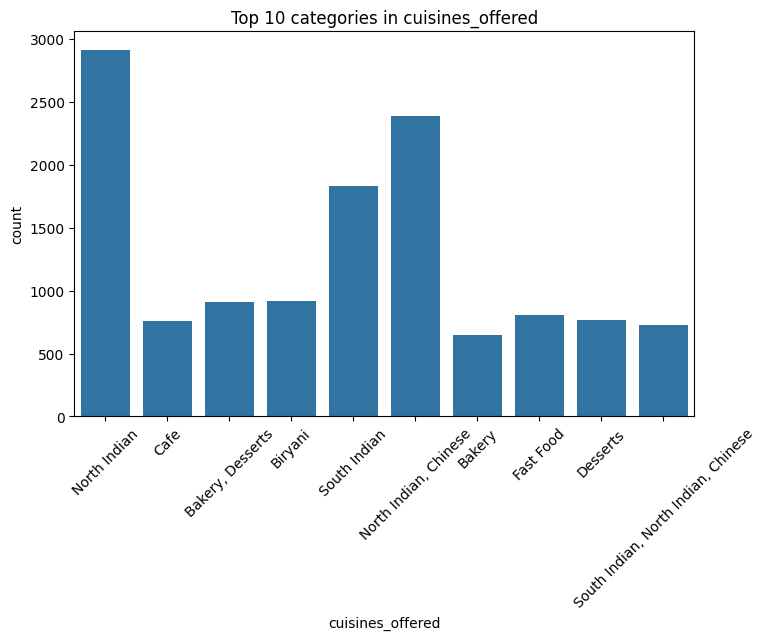

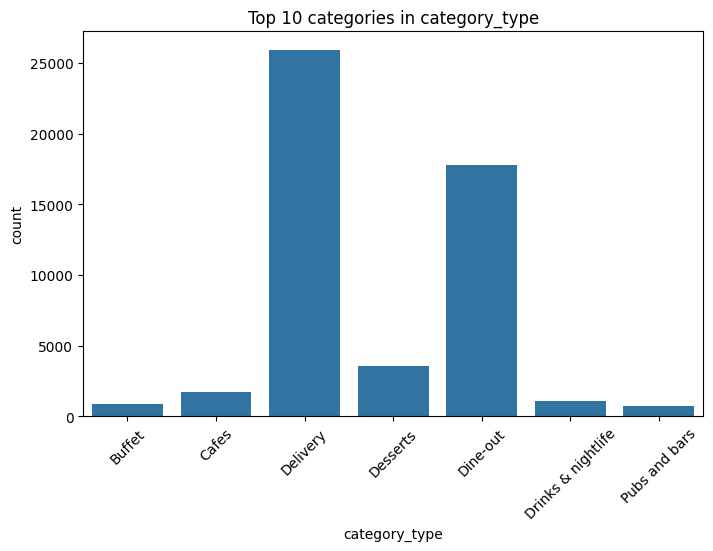

) missing from font(s) DejaVu Sans.ams\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


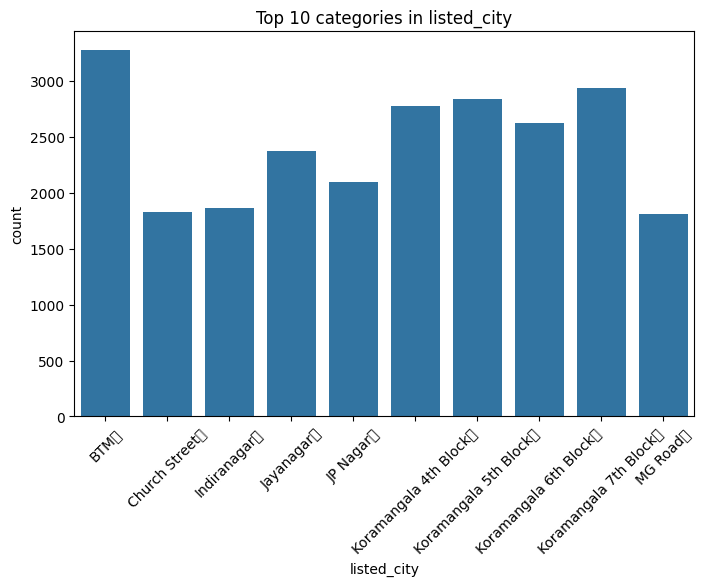

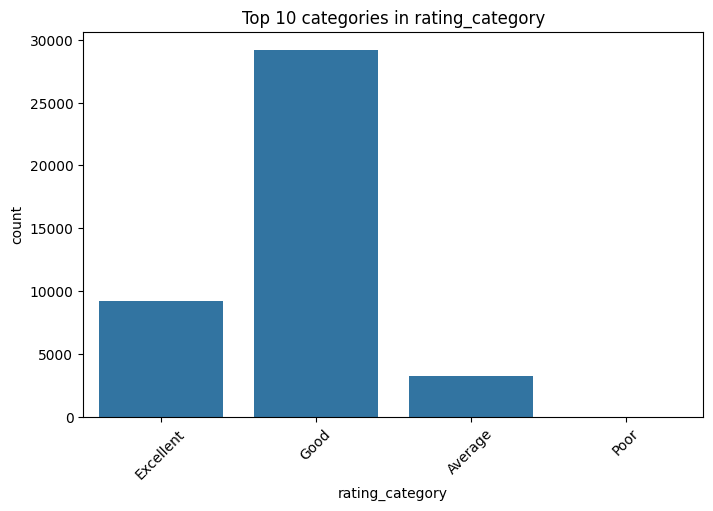

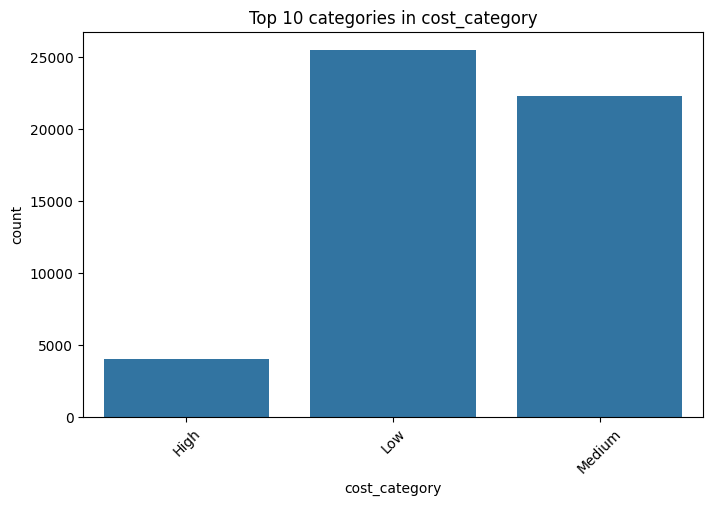

In [9]:
cat_cols = ['restaurant_name', 'online_order', 'book_table', 'city_locality', 
            'restaurant_type', 'popular_dishes', 'cuisines_offered', 'category_type', 
            'listed_city', 'rating_category', 'cost_category']
for col in cat_cols:
    plt.figure(figsize=(8,5))
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, data=df[df[col].isin(top_categories)])
    plt.title(f'Top {10} categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

## Columns 

In [10]:
df.head(5)

,restaurant_name,online_order,book_table,rating,number_of_votes,city_locality,restaurant_type,popular_dishes,cuisines_offered,approx_cost_for_two,category_type,listed_city,rating_category,cost_category,online_order_flag,book_table_flag,num_cuisines,num_dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari\r,Excellent,High,1,1,3,7
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari\r,Excellent,High,1,0,3,7
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari\r,Good,High,1,0,3,7
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari\r,Good,Low,0,0,2,1
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari\r,Good,Medium,0,0,2,2


In [11]:
df.columns

Index(['restaurant_name', 'online_order', 'book_table', 'rating',
       'number_of_votes', 'city_locality', 'restaurant_type', 'popular_dishes',
       'cuisines_offered', 'approx_cost_for_two', 'category_type',
       'listed_city', 'rating_category', 'cost_category', 'online_order_flag',
       'book_table_flag', 'num_cuisines', 'num_dishes'],
      dtype='object')

### Columns Type:-
    - Numerical :- rating, number_of_votes, approx_cost_for_two
    - Categorical :- restaurant_name, online_order, book_table, city_locality, restaurant_type, popular_dishes, cuisines_offered, 
                     category_type, listed_city, rating_category, cost_category
    - Boolean :- online_order_flag, book_table_flag, num_cuisines, num_dishes

## Reasons for Non-Growing/Low-Rated Restaurants

#### Is location affecting restaurant growth?
- Are there certain areas or localities where restaurants consistently have low ratings or low growth?

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_5872\3118078075.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


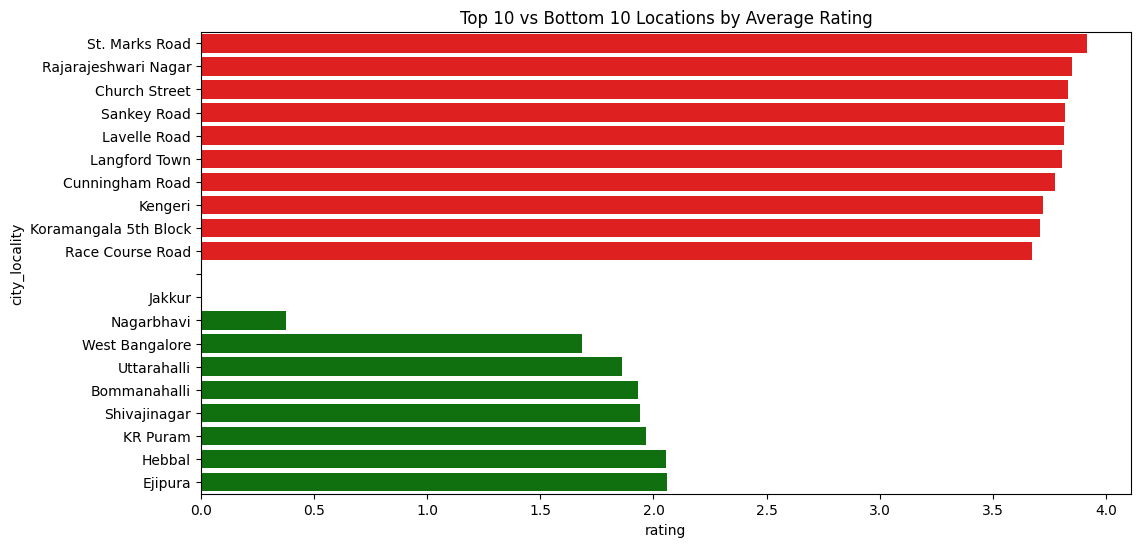

In [37]:
# Top 10 high-rated
top10 = df.groupby('city_locality')['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Bottom 10 low-rated
bottom10 = df.groupby('city_locality')['rating'].mean().sort_values().head(10).reset_index()

# Combine
combined = pd.concat([top10, bottom10])
df_combined = df[df['city_locality'].isin(combined['city_locality'])]

# Horizontal barplot
plt.figure(figsize=(12,6))
sns.barplot(
    x='rating', 
    y='city_locality', 
    data=combined, 
    palette=['red']*10 + ['green']*10  # bottom 10 = red, top 10 = green
)
plt.title("Top 10 vs Bottom 10 Locations by Average Rating")
plt.show()


C:\Users\Rupesh\AppData\Local\Temp\ipykernel_7760\2249533496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_bottom['group'] = df_top_bottom['city_locality'].apply(


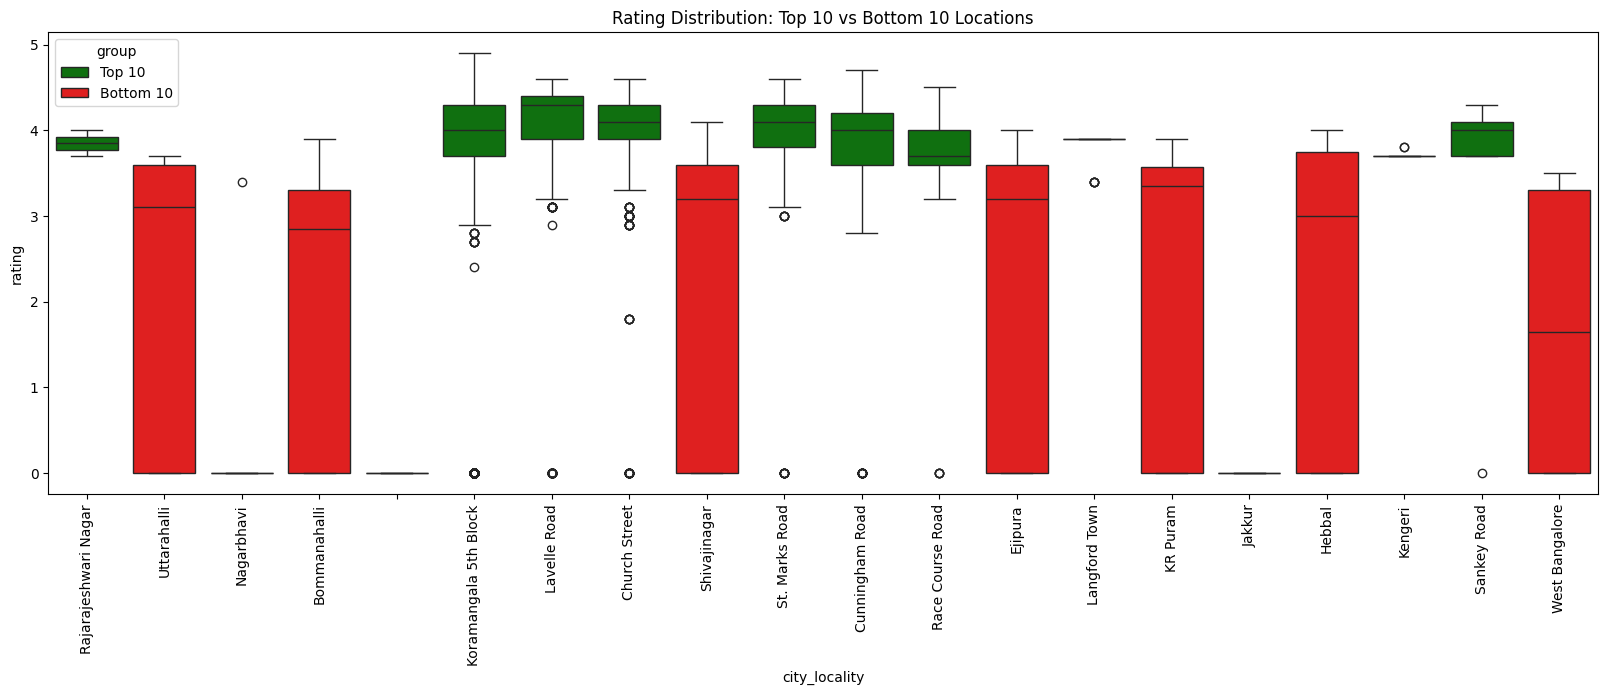

In [17]:
# Step 1: Mark Top & Bottom
df_top_bottom['group'] = df_top_bottom['city_locality'].apply(
    lambda x: 'Top 10' if x in top10_high['city_locality'].values else 'Bottom 10'
)

# Step 2: Boxplot with hue
plt.figure(figsize=(20,6))
sns.boxplot(x='city_locality', y='rating', hue='group', data=df_top_bottom, palette={'Top 10':'green','Bottom 10':'red'})
plt.xticks(rotation=90)
plt.title("Rating Distribution: Top 10 vs Bottom 10 Locations")
plt.show()


### Are essential features missing?

- Do low-rated restaurants lack features like online ordering or table booking?

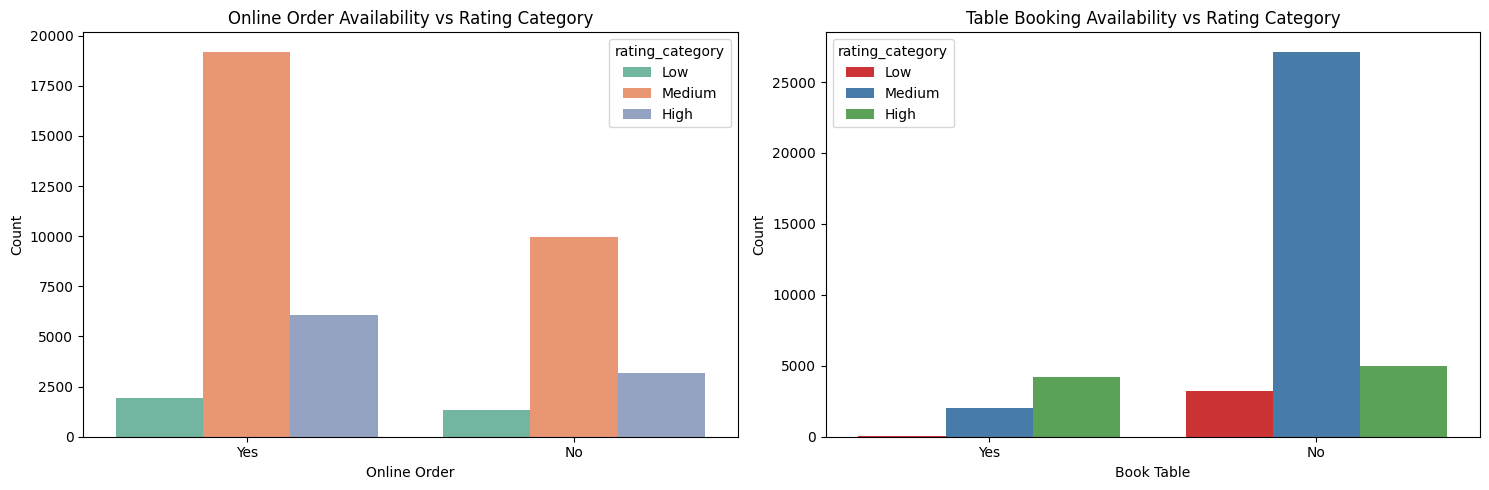

In [41]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))  # 1 row, 2 columns

# Online Order plot
sns.countplot(x='online_order', hue='rating_category', data=df, palette='Set2', ax=axes[0])
axes[0].set_title("Online Order Availability vs Rating Category")
axes[0].set_xlabel("Online Order")
axes[0].set_ylabel("Count")

# Book Table plot
sns.countplot(x='book_table', hue='rating_category', data=df, palette='Set1', ax=axes[1])
axes[1].set_title("Table Booking Availability vs Rating Category")
axes[1].set_xlabel("Book Table")
axes[1].set_ylabel("Count")
plt.tight_layout()  
plt.show()

### **Conslusion:**
- Restaurants that offer online ordering generally receive higher ratings, indicating that customers value convenience.
- Providing fast delivery or guaranteed delivery times can further enhance restaurant ratings and customer satisfaction.
- Customers increasingly prefer ordering online over dining in, suggesting that Zomato should focus promotions and partnerships on restaurants with strong delivery capabilities.

#### Is cuisine type impacting performance?
- Do certain cuisines consistently have lower ratings or popularity?

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_6528\2113056022.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cuisines_offered', y='rating', data=df_top, palette='Greens', ax=axes[0])
C:\Users\Rupesh\AppData\Local\Temp\ipykernel_6528\2113056022.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cuisines_offered', y='rating', data=df_bottom, palette='Reds', ax=axes[1])


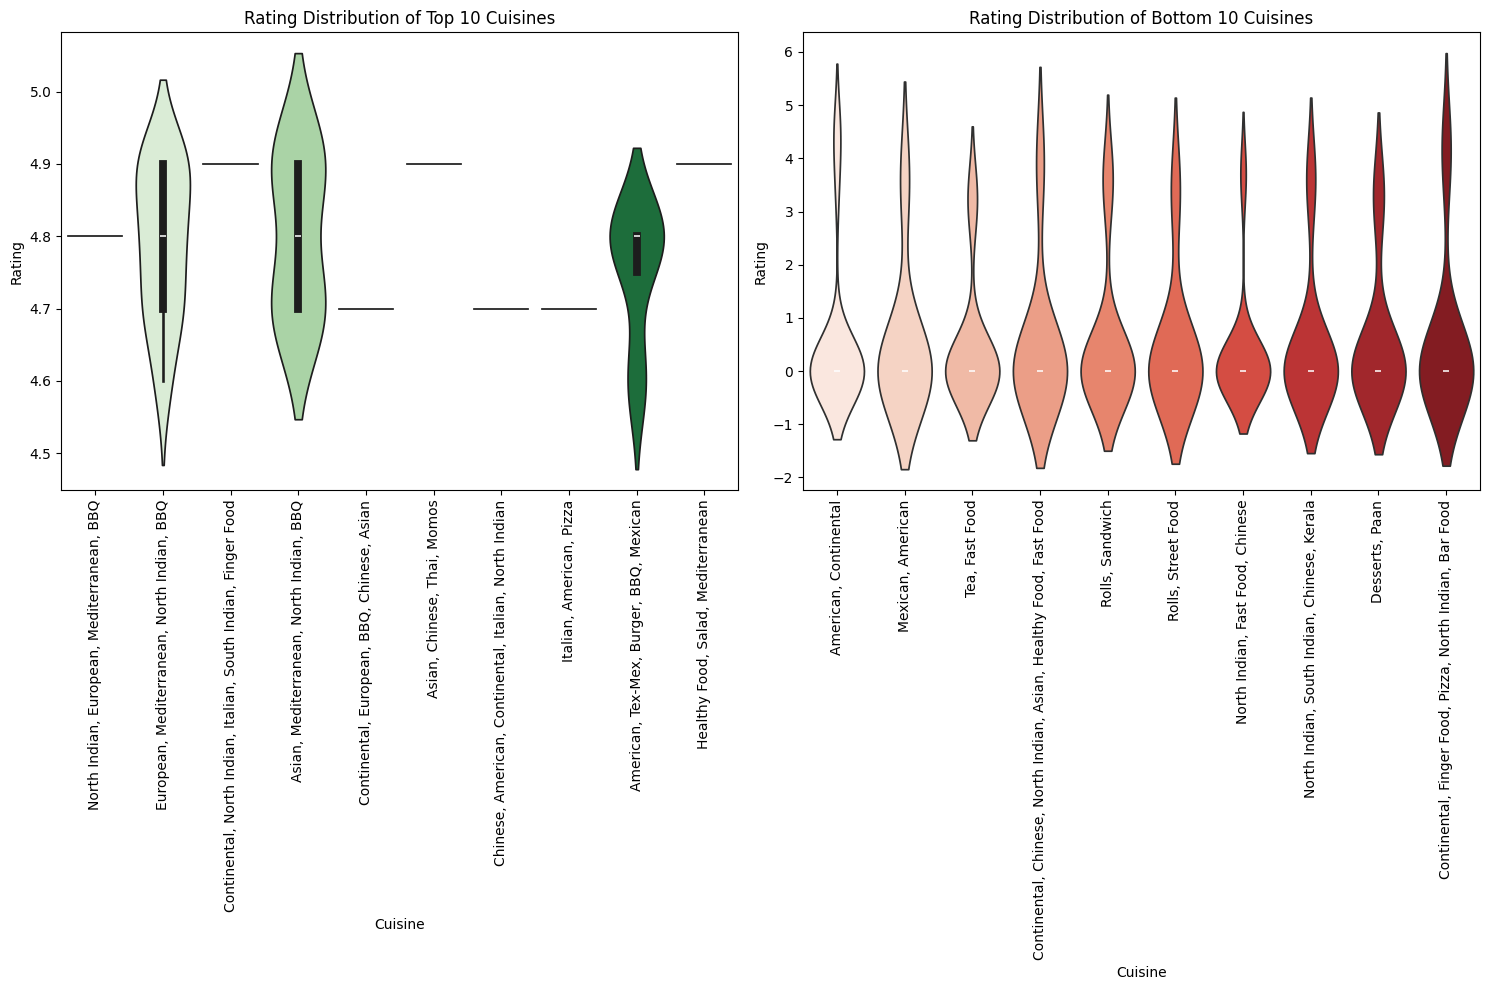

In [66]:
# Step 1: Get top 10 and bottom 10 cuisines based on average rating
group = df.groupby('cuisines_offered')['rating'].mean().reset_index()
top_10_cuisines = group.sort_values(by='rating', ascending=False).head(10)['cuisines_offered']
bottom_10_cuisines = group[(group['rating'] > 0.0) ].sort_values(by='rating', ascending=True).head(10)['cuisines_offered']

# Step 2: Filter original DataFrame for these cuisines
df_top = df[df['cuisines_offered'].isin(top_10_cuisines)]
df_bottom = df[df['cuisines_offered'].isin(bottom_10_cuisines)]

# Step 3: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,10))  # 1 row, 2 columns

# Violin plot for Top 10 cuisines
sns.violinplot(x='cuisines_offered', y='rating', data=df_top, palette='Greens', ax=axes[0])
axes[0].set_title("Rating Distribution of Top 10 Cuisines")
axes[0].set_xlabel("Cuisine")
axes[0].set_ylabel("Rating")
axes[0].tick_params(axis='x', rotation=90)

# Violin plot for Bottom 10 cuisines
sns.violinplot(x='cuisines_offered', y='rating', data=df_bottom, palette='Reds', ax=axes[1])
axes[1].set_title("Rating Distribution of Bottom 10 Cuisines")
axes[1].set_xlabel("Cuisine")
axes[1].set_ylabel("Rating")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [69]:
group[group['cuisines_offered']=='North Indian, European, Mediterranean, BBQ']

,cuisines_offered,rating
2074,"North Indian, European, Mediterranean, BBQ",4.8


In [70]:
df[df['rating']==4.8]

,restaurant_name,online_order,book_table,rating,number_of_votes,city_locality,restaurant_type,popular_dishes,cuisines_offered,approx_cost_for_two,category_type,listed_city,rating_category,cost_category,online_order_flag,book_table_flag,num_cuisines,num_dishes
3338,Brahmin's Coffee Bar,No,No,4.8,2679,Basavanagudi,Quick Bites,"Filter Coffee, Kesari Bath, Idli Vada, Upma, B...",South Indian,100.0,Dine-out,Basavanagudi\r,Excellent,Low,0,0,1,7
3762,The Black Pearl,No,Yes,4.8,7023,Marathahalli,"Casual Dining, Bar","Dahipuri, Jal-jeera, Chicken Grill, Mutton See...","North Indian, European, Mediterranean, BBQ",1.0,Buffet,Bellandur\r,Excellent,Low,0,1,4,7
4800,The Black Pearl,No,Yes,4.8,7023,Marathahalli,"Casual Dining, Bar","Dahipuri, Jal-jeera, Chicken Grill, Mutton See...","North Indian, European, Mediterranean, BBQ",1.0,Dine-out,Bellandur\r,Excellent,Low,0,1,4,7
4963,The Black Pearl,No,Yes,4.8,7023,Marathahalli,"Casual Dining, Bar","Dahipuri, Jal-jeera, Chicken Grill, Mutton See...","North Indian, European, Mediterranean, BBQ",1.0,Pubs and bars,Bellandur\r,Excellent,Low,0,1,4,7
6745,AB's - Absolute Barbecues,No,Yes,4.8,2882,Whitefield,Casual Dining,"Mutton Roganjosh, Mutton Keema, Mutton Curry, ...","European, Mediterranean, North Indian, BBQ",1.0,Buffet,Brookefield\r,Excellent,Low,0,1,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46973,CTR,Yes,No,4.8,4421,Malleshwaram,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Dine-out,Rajajinagar\r,Excellent,Low,1,0,1,7
47203,Chili's American Grill & Bar,Yes,Yes,4.8,6470,Malleshwaram,"Casual Dining, Bar","Veg Platter, Burgers, Mushroom Soup, Cocktails...","American, Tex-Mex, Burger, BBQ, Mexican",1.0,Pubs and bars,Rajajinagar\r,Excellent,Low,1,1,5,7
50266,Punjab Grill,Yes,No,4.8,650,Whitefield,Casual Dining,"Kulfi, Lunch Buffet, Murgh Lababdar, Kadhai Pa...",North Indian,2.0,Delivery,Whitefield\r,Excellent,Low,1,0,1,7
51041,AB's - Absolute Barbecues,No,Yes,4.8,3009,Whitefield,Casual Dining,"Mutton Roganjosh, Mutton Keema, Mutton Curry, ...","European, Mediterranean, North Indian, BBQ",1.0,Dine-out,Whitefield\r,Excellent,Low,0,1,4,7


### **Conclusion:**
- Top Performing Cuisines (High Ratings, Consistent Quality): The highest-rated cuisine combinations (e.g., 'North Indian, European, Mediterranean, BBQ' and 'American, Tex-Mex, Burger, BBQ, Mexican') are tightly clustered between 4.7 and 5.0. The narrow, dense shapes of these violins indicate high, reliable quality among the top segment, likely representing high-end or established brands that consistently exceed customer expectations.

- Bottom Performing Cuisines (Low Ratings, High Risk): The lowest-rated combinations show distributions clustered around 0.0 to 1.0, with long tails extending upwards. This suggests that a vast number of restaurants in these categories (like 'Mexican, American,' 'Tea, Fast Food,' and 'North Indian, South Indian, Chinese, Kerala') are either failing quickly (receiving ratings near zero) or are highly volatile. These are the high-risk segments for Zomato.

- Actionable Insight: Promotions should focus on the consistent performers in the Top 10 list. The Bottom 10 list represents segments where Zomato should focus on quality control or perhaps de-listing underperformers to improve the overall platform experience.

### Does restaurant type affect growth?
- Is the type of restaurant (casual dining, cafe, bar, fine dining) correlated with ratings or growth?

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_7760\1387415042.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


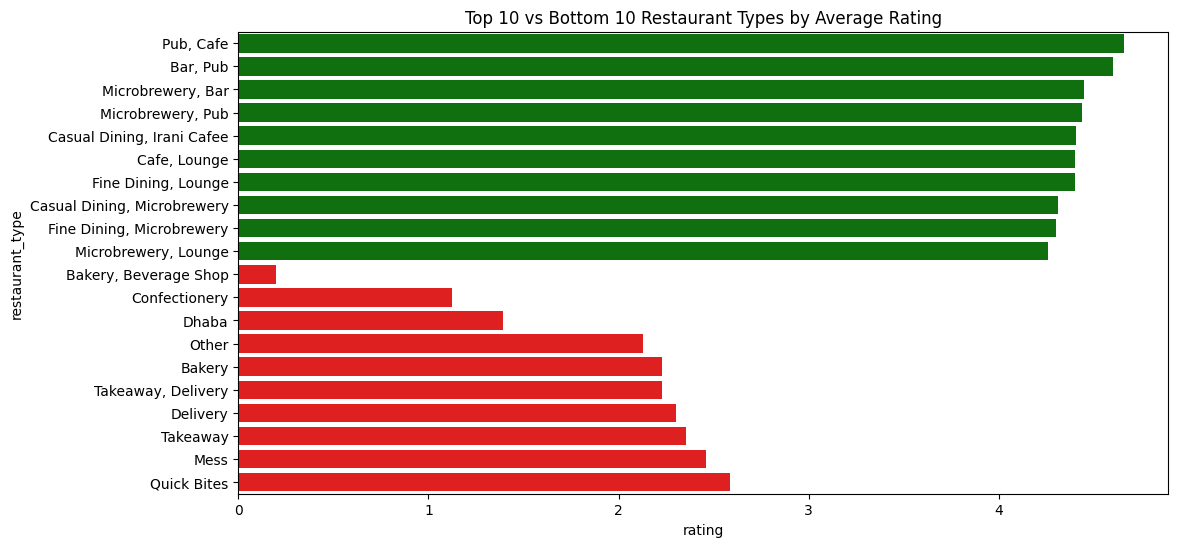

In [63]:
group = df.groupby('restaurant_type')['rating'].mean().reset_index()

# Top 10
top_10 = group.sort_values(by='rating', ascending=False).head(10)

# Bottom 10 (only positive ratings)
bottom_10 = group[group['rating'] > 0.0].sort_values(by='rating', ascending=True).head(10)

# Combine
combined = pd.concat([top_10, bottom_10])

# Horizontal barplot
plt.figure(figsize=(12,6))
sns.barplot(
    x='rating',
    y='restaurant_type',
    data=combined,
    palette=['green']*10 + ['red']*10
)
plt.title("Top 10 vs Bottom 10 Restaurant Types by Average Rating")
plt.show()

## **Conclusion:**
- Restaurant type significantly affects growth. Categories like pubs, cafes, microbreweries, and lounges tend to contribute more to restaurant growth and profitability.
- On the other hand, types such as quick bites, takeaway outlets, delivery-only restaurants, and dhabas are less profitable compared to higher-end or experiential dining options.
- This insight suggests that Zomato should prioritize promotions and partnerships with restaurant types that drive higher growth and profitability.

### Is pricing an issue?
- Are low-rated restaurants charging higher prices compared to others?

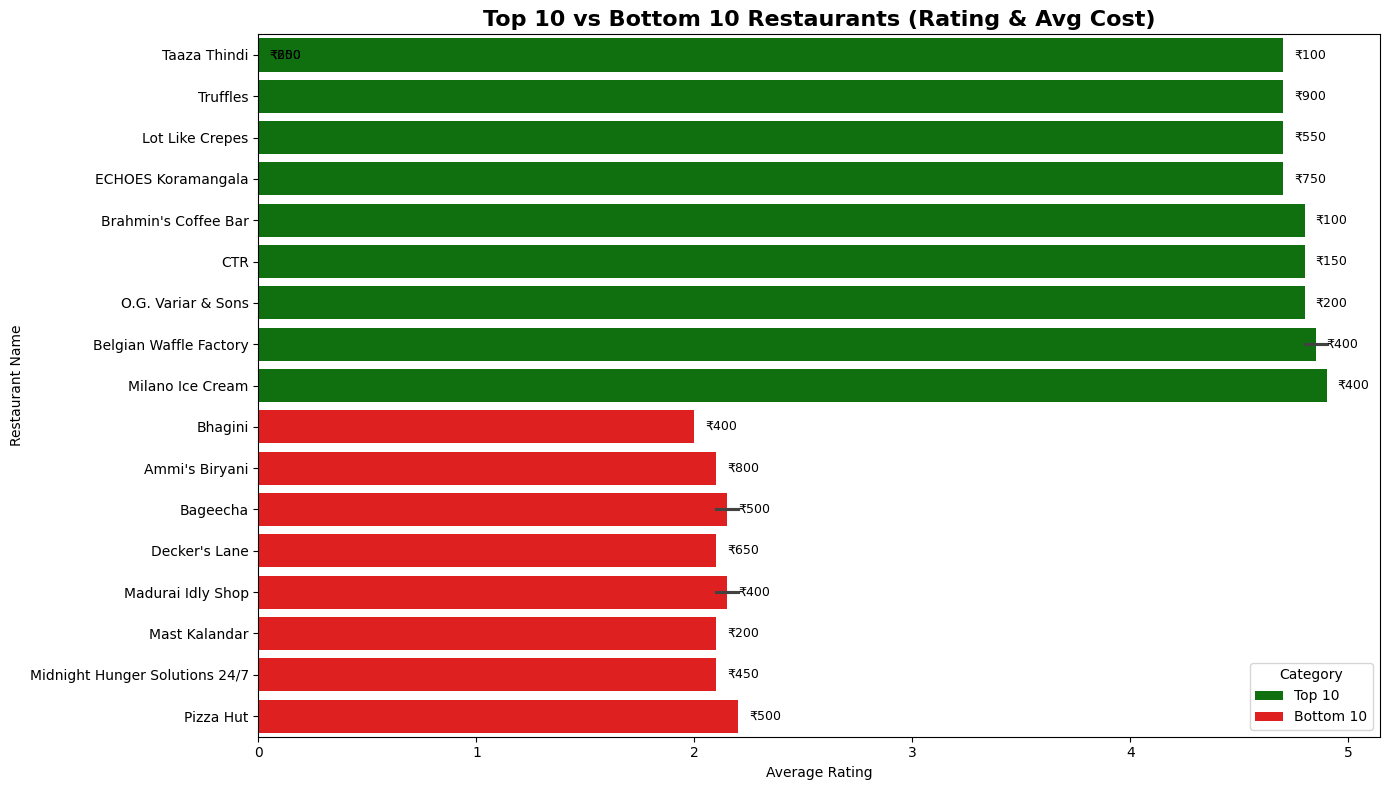

In [13]:
top_10["Category"] = "Top 10"
bottom_10["Category"] = "Bottom 10"
combined = pd.concat([top_10, bottom_10])

# Sort for better visual
combined = combined.sort_values(by=["Category","rating"], ascending=[False, True])

plt.figure(figsize=(14,8))
ax = sns.barplot(
    data=combined,
    x="rating",
    y="restaurant_name",
    hue="Category",   
    dodge=False,
    palette={"Top 10": "green", "Bottom 10": "red"}
)

# Add cost annotations correctly
for p, (_, row) in zip(ax.patches, combined.iterrows()):
    ax.text(
        p.get_width() + 0.05,                 # position to the right of bar
        p.get_y() + p.get_height()/2,         # center of the bar
        f"₹{int(row['approx_cost_for_two'])}", 
        va="center", ha="left", fontsize=9, color="black"
    )

plt.title("Top 10 vs Bottom 10 Restaurants (Rating & Avg Cost)", fontsize=16, weight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Name")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

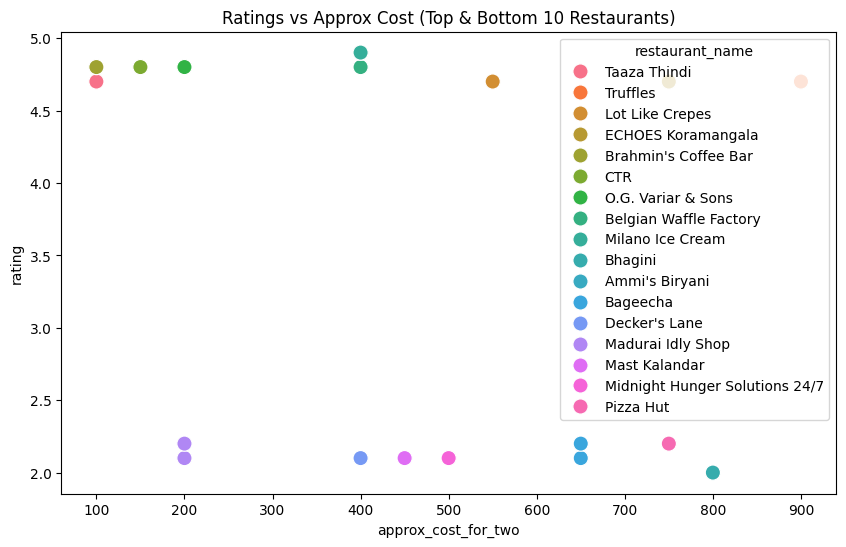

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="approx_cost_for_two",
    y="rating",
    hue="restaurant_name",
    data=combined,
    s=120
)
plt.title("Ratings vs Approx Cost (Top & Bottom 10 Restaurants)")
plt.show()


### **Conclusion:**
- Price does not significantly affect restaurant growth.
- Restaurant growth on Zomato is driven more by features, quality, and type of restaurant than by pricing. Pubs, cafes, microbreweries, and lounges show higher profitability, while quick bites, takeaway outlets, and delivery-only restaurants contribute less. Restaurants offering online ordering and table booking tend to receive higher ratings, indicating that customer convenience significantly impacts growth. These insights suggest that Zomato should focus promotions and partnerships on high-rated, popular restaurants with strong features and high growth potential.

### Is there a relationship between ratings and review counts?

- Are low ratings accompanied by low votes, and could high-rated but low-vote restaurants represent growth opportunities?

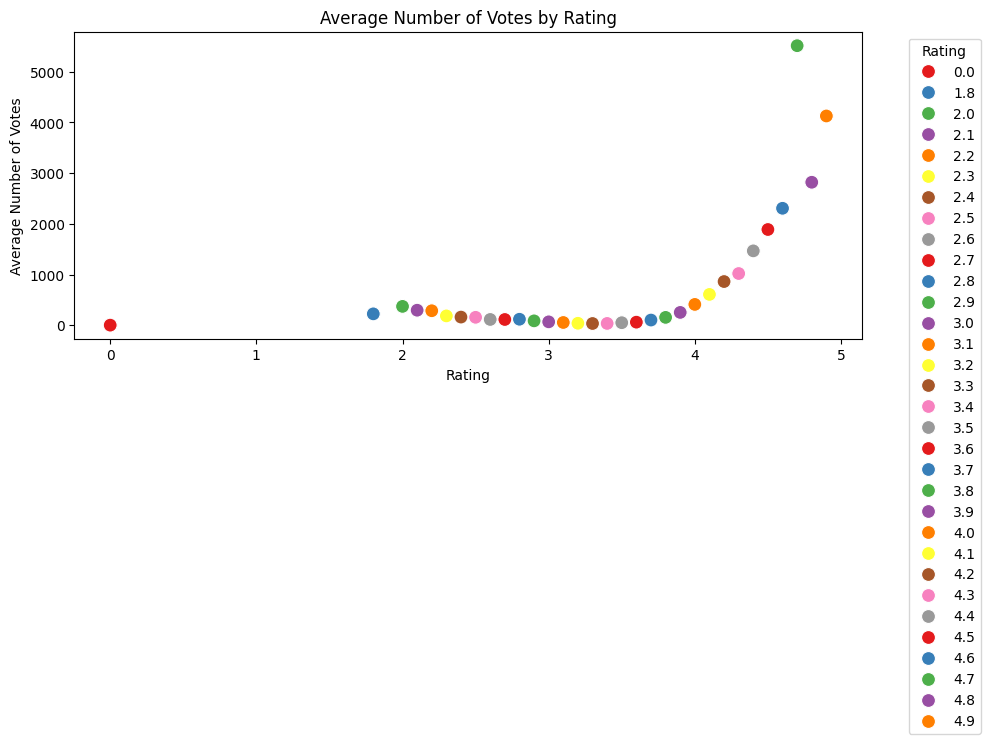

In [87]:
group = df.groupby('rating')['number_of_votes'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='rating',
    y='number_of_votes',
    data=group,
    hue='rating',
    palette='Set1',
    s=100
)
plt.title("Average Number of Votes by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Number of Votes")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Conclusion:**
- The analysis across the scatter plot votes plot reveals a weak and non-linear relationship between cost and rating, suggesting that price is not a primary factor in determining customer satisfaction. However, rating is a critical driver of popularity (votes).

### **Strategic Recommendation:**
#### For Zomato, the key performance indicator is Rating, not Cost:
- Focus on Quality: The primary strategic goal should be to identify and promote restaurants with ratings of 4.0 and above, as these are the establishments that generate exponential user engagement and loyalty.
- Ignore Price as a Filter: Price alone should not be used as a primary filter for predicting quality or performance. The market shows that great performance can be achieved at both high and low costs.

### Which cities (or restaurant types) have consistently high-rated restaurants?

) missing from font(s) DejaVu Sans.ams\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


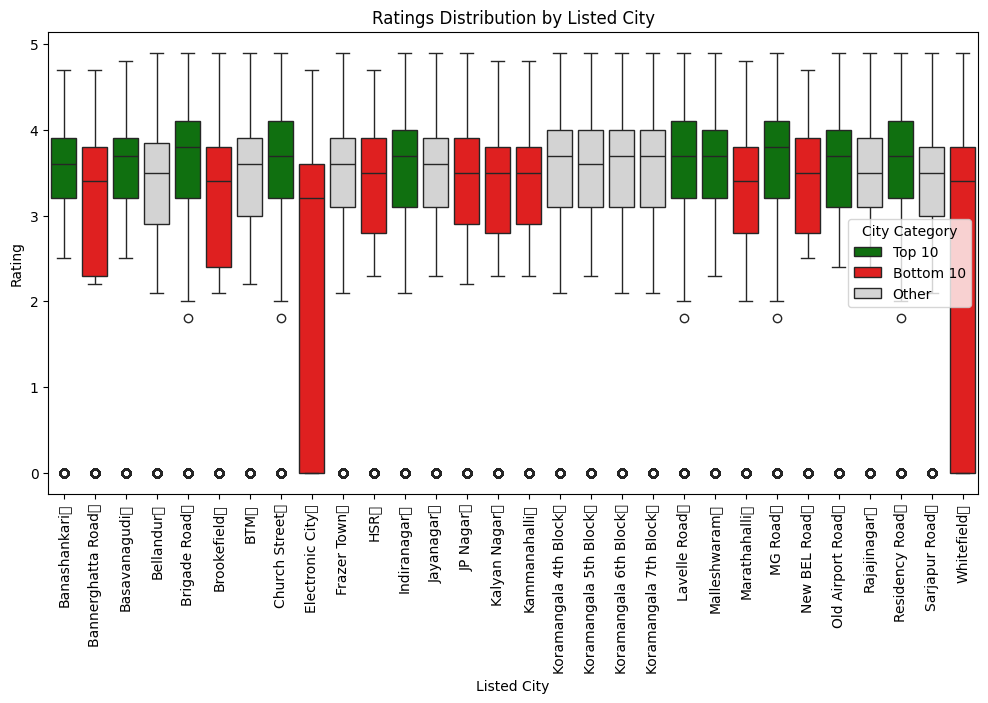

In [94]:
group = df.groupby('listed_city')['rating'].mean().reset_index()

# Top 10 cities
top_10 = group.sort_values(by='rating', ascending=False).head(10)['listed_city'].tolist()

# Bottom 10 cities with rating > 0
bottom_10 = group[group['rating'] > 0.0].sort_values(by='rating').head(10)['listed_city'].tolist()

# Create a new column to mark category
df['city_category'] = df['listed_city'].apply(lambda x: 'Top 10' if x in top_10 else ('Bottom 10' if x in bottom_10 else 'Other'))

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(
    x='listed_city',
    y='rating',
    data=df,
    hue='city_category',   # use the category for colors
    palette={'Top 10':'green','Bottom 10':'red','Other':'lightgray'}
)
plt.title('Ratings Distribution by Listed City')
plt.xticks(rotation=90)
plt.xlabel('Listed City')
plt.ylabel('Rating')
plt.legend(title='City Category')
plt.show()


### **Conclusion:**
- Location does not significantly impact restaurant popularity or growth.
- Restaurant success depends more on features, quality, type, and customer experience rather than the city or area in which it is located.

### **Strategic Recommendation:**
- As observed from the ratings distribution across cities, both top- and bottom-rated cities have high variability, indicating that growth is not strongly tied to location.

## Promoting Successful Restaurants

### Which restaurants offer the best value for money and should be promoted?

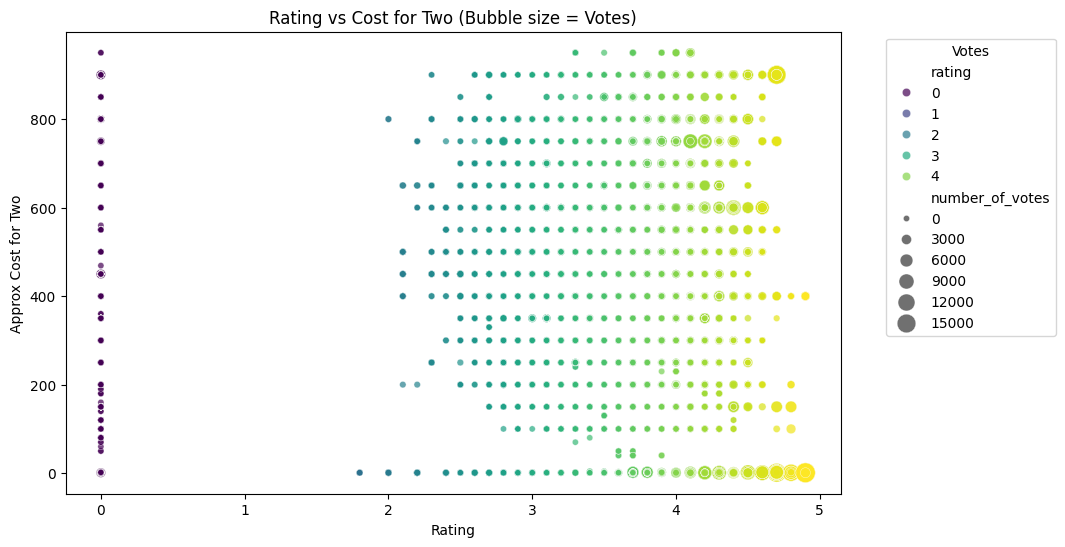

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='rating', 
    y='approx_cost_for_two', 
    size='number_of_votes', 
    sizes=(20, 200), 
    hue='rating', 
    palette='viridis', 
    data=df,
    alpha=0.7
)
plt.title('Rating vs Cost for Two (Bubble size = Votes)')
plt.xlabel('Rating')
plt.ylabel('Approx Cost for Two')
plt.legend(title='Votes', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### **Conclusion:**
- The primary conclusion is that Rating drives popularity, but Cost does not drive Rating. For Zomato's strategic growth, efforts should focus on promoting and ensuring the quality of restaurants that have already achieved a high rating (4.0+) with a high number of votes, regardless of whether they are a budget-friendly spot or a premium establishment.

### Do online order features matter?

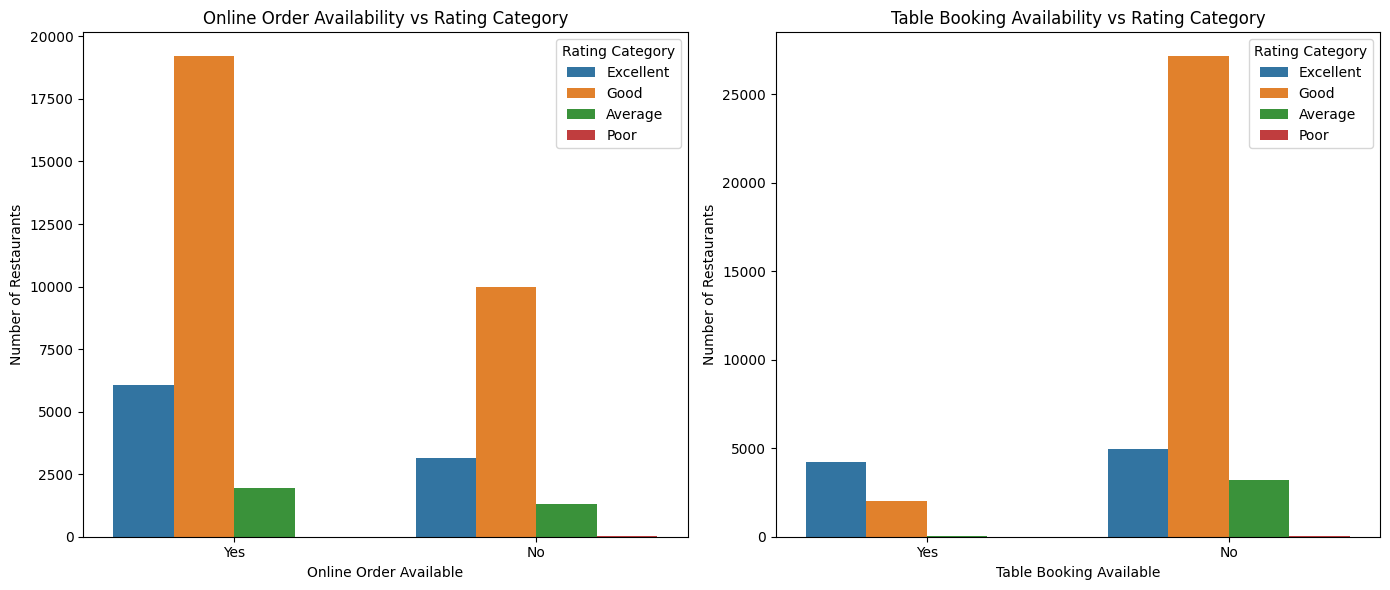

In [42]:
# Set figure size and layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot 1: Online Order vs Rating Category
sns.countplot(x='online_order', hue='rating_category', data=df, ax=axes[0])
axes[0].set_title('Online Order Availability vs Rating Category')
axes[0].set_xlabel('Online Order Available')
axes[0].set_ylabel('Number of Restaurants')
axes[0].legend(title='Rating Category')

# Plot 2: Book Table vs Rating Category
sns.countplot(x='book_table', hue='rating_category', data=df, ax=axes[1])
axes[1].set_title('Table Booking Availability vs Rating Category')
axes[1].set_xlabel('Table Booking Available')
axes[1].set_ylabel('Number of Restaurants')
axes[1].legend(title='Rating Category')

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### **Conclusion:**
- Restaurants that offer online ordering generally receive higher ratings, indicating that customers value convenience.
- Providing fast delivery or guaranteed delivery times can further enhance restaurant ratings and customer satisfaction.
- Customers increasingly prefer ordering online over dining in, suggesting that Zomato should focus promotions and partnerships on restaurants with strong delivery capabilities.

### Does offering a higher number of dishes on the menu lead to a higher restaurant rating?

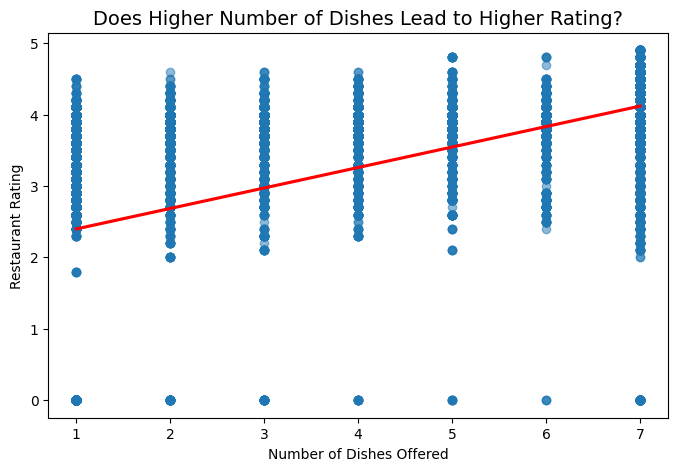

In [7]:
plt.figure(figsize=(8,5))
sns.regplot(x="num_dishes", y="rating", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Does Higher Number of Dishes Lead to Higher Rating?", fontsize=14)
plt.xlabel("Number of Dishes Offered")
plt.ylabel("Restaurant Rating")
plt.show()



### **Conclusion:**
- There is a positive correlation between the number of dishes offered and the restaurant rating.
- As the number of dishes increases, the average rating also tends to increase.
- However, the relationship is not very strong (the scatter points are widely spread). This means while a larger menu can contribute to higher ratings, it is not the only factor—other aspects like service quality, taste, pricing, and ambiance also play important roles.